<a href="https://colab.research.google.com/github/oyaon/ML-Dengue-Prediction/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [4]:
df= pd.read_csv('/MAIN - Sheet1.csv')

In [5]:
df

,Date,Cases,Max_Temp,Min_Temp,Rainfall,Humidity
0,1/1/2022,1.0,26.4,15.6,0.0,71.0
1,1/2/2022,7.0,23.0,15.0,0.0,83.0
2,1/3/2022,4.0,25.6,14.3,0.0,74.0
3,1/4/2022,2.0,25.5,14.0,0.0,76.0
4,1/5/2022,2.0,23.8,13.3,0.0,83.0
...,...,...,...,...,...,...
1091,12/27/2024,76.0,28.0,15.0,0.0,NaN
1092,12/28/2024,33.0,28.0,16.0,0.0,NaN
1093,12/29/2024,60.0,25.0,14.0,0.0,NaN
1094,12/30/2024,NaN,25.0,14.0,0.0,NaN


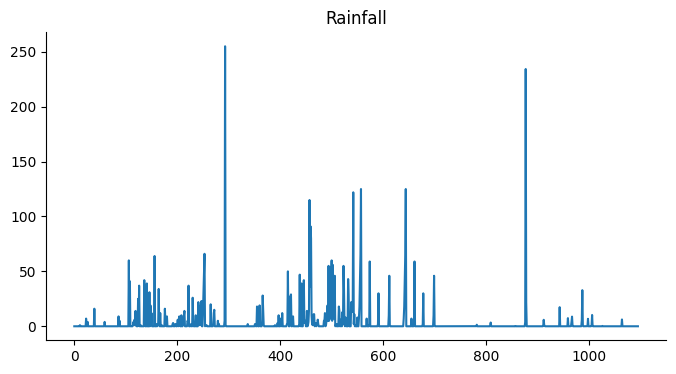

In [6]:
# @title Rainfall

from matplotlib import pyplot as plt
df['Rainfall'].plot(kind='line', figsize=(8, 4), title='Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
import matplotlib.pyplot as plt

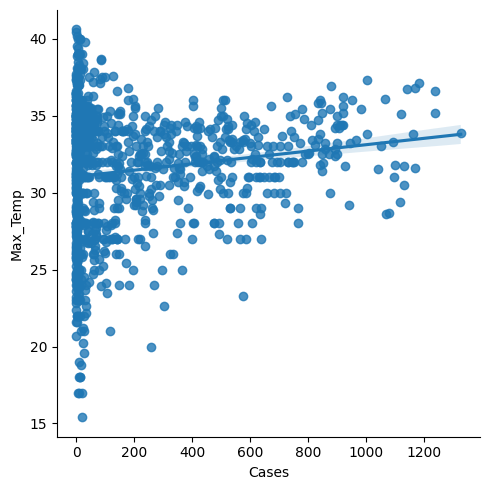

In [10]:
sns.lmplot(x='Cases', y='Max_Temp', data=df)
plt.show()

In [11]:
import statsmodels.api as sm

X = df['Cases']
y = df['Max_Temp']

X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())


MissingDataError: exog contains inf or nans

In [12]:
import statsmodels.api as sm
import numpy as np

X = df['Cases']
y = df['Max_Temp']

# Convert infinite values to NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values in X or y
df_cleaned = df.dropna(subset=['Cases', 'Max_Temp'])
X = df_cleaned['Cases']
y = df_cleaned['Max_Temp']

X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Max_Temp   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     23.09
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           1.77e-06
Time:                        18:01:07   Log-Likelihood:                -3047.0
No. Observations:                1090   AIC:                             6098.
Df Residuals:                    1088   BIC:                             6108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0406      0.145    213.686      0.0